In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from typing import List, Tuple, Optional, Sequence, Union
import datetime
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

plt.rcParams["font.size"] = 16

from qiskit import QuantumCircuit, IBMQ, schedule
import qiskit.pulse as pulse
from qiskit.quantum_info.states import Statevector
from qiskit_dynamics import Solver, Signal
from qiskit_dynamics.pulse import InstructionToSignals
from qiskit.providers import BackendV2, QubitProperties
from qiskit.providers.options import Options
from qiskit.result import Result
from qiskit.transpiler import Target


from qiskit.providers.models import PulseDefaults
from qiskit.qobj.pulse_qobj import PulseLibraryItem, PulseQobjInstruction
from qiskit.providers.models.pulsedefaults import Command

from qiskit_experiments.exceptions import QiskitError

In [3]:
# IBMQ.load_account()
# provider = IBMQ.get_provider(hub="ibm-q", group="open", project="main")
# h_backend = provider.get_backend("ibmq_lima")

In [70]:
from qiskit_experiments.test.iq_pulse_backend import SingleTransmonTestBackend
pulse_backend = SingleTransmonTestBackend()

# Calibration Experiments

In [71]:
from qiskit_experiments.calibration_management.calibrations import Calibrations
from qiskit_experiments.calibration_management.basis_gate_library import (
    FixedFrequencyTransmon,
)

In [72]:
from qiskit_experiments.library.calibration import RoughXSXAmplitudeCal

library = FixedFrequencyTransmon(default_values={"duration": 320})
cals = Calibrations.from_backend(pulse_backend, libraries=[library])

qubit = 0
rabi = RoughXSXAmplitudeCal(
    qubit, cals, backend=pulse_backend, amplitudes=np.linspace(-0.1, 0.1, 51)
)

In [73]:
# from qiskit_experiments.framework import ExperimentData
# edata = ExperimentData(experiment=rabi, backend=h_backend)
# edata.add_jobs([h_backend.retrieve_job('6329ce3ee150f1714e9def80')])
# edata.data()

In [74]:
data = rabi.run().block_for_results()

/home/rupeshknn/miniconda3/envs/exp/lib/python3.8/site-packages/numpy/lib/function_base.py:2411: RuntimeWarning: invalid value encountered in <lambda> (vectorized)
  outputs = ufunc(*inputs)


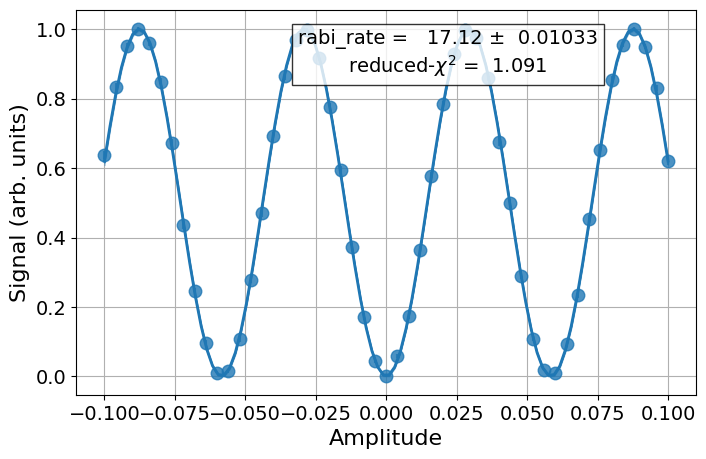

In [75]:
data.figure(0)

In [58]:
np.array(edata.data()[0]['memory']).tolist()

[[[387186570559488.0, -1561126928121856.0]],
 [[-886706400133120.0, -1410005014151168.0]],
 [[-853778496487424.0, -1847212015353856.0]],
 [[-878241220919296.0, -1642490117488640.0]],
 [[-728926817091584.0, -1498273168752640.0]],
 [[-1024057373884416.0, -1803973908496384.0]],
 [[563893638266880.0, -1535449600360448.0]],
 [[-1162535038353408.0, -2048183601463296.0]],
 [[-1136705507688448.0, -1480672124338176.0]],
 [[-741990832537600.0, -1315828058292224.0]],
 [[-727130514128896.0, -1991472719069184.0]],
 [[384352395460608.0, -1704574540840960.0]],
 [[-1491892726398976.0, -1598256115089408.0]],
 [[-857311979503616.0, -1438557285646336.0]],
 [[671630074314752.0, -1770083797958656.0]],
 [[404036129914880.0, -1853629099147264.0]],
 [[38135144644608.0, -1867371249664000.0]],
 [[-739085354270720.0, -1506405689327616.0]],
 [[-515131834368000.0, -1536662257532928.0]],
 [[336556355223552.0, -1480877745897472.0]],
 [[-884146532515840.0, -1284005169201152.0]],
 [[-821661670572032.0, -16842343810334

Options(shots=4000, memory=False, qubit_lo_freq=None, meas_lo_freq=None, schedule_los=None, meas_level=<MeasLevel.CLASSIFIED: 2>, meas_return=<MeasReturnType.AVERAGE: 'avg'>, memory_slots=None, memory_slot_size=100, rep_time=None, rep_delay=None, init_qubits=True, use_measure_esp=None, live_data_enabled=None)

In [ ]:
dict_keys(['memory', 'job_id', 'metadata', 'shots', 'meas_level'])


In [18]:
# %%time
# results = pulse_backend.run(rabi.circuits(), **rabi.run_options.__dict__)

#Analysis
# rabi_prob1 = np.array([psi.probabilities()[1] for psi in results])

In [45]:
from qiskit.qobj.utils import MeasLevel

In [53]:
MeasLevel.KERNELED

<MeasLevel.KERNELED: 1>

In [60]:
pulse_backend.options

Options(shots=1024)

In [40]:
# results.result()

Result(backend_name='SingleTransmonTestBackend', backend_version='0.0.1', qobj_id='0', job_id='0', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=None, data=ExperimentResultData(), header=QobjExperimentHeader(metadata={'experiment_type': 'RoughXSXAmplitudeCal', 'qubits': (0,), 'xval': -0.1, 'unit': 'arb. unit', 'amplitude': -0.1})), ExperimentResult(shots=1024, success=True, meas_level=None, data=ExperimentResultData(), header=QobjExperimentHeader(metadata={'experiment_type': 'RoughXSXAmplitudeCal', 'qubits': (0,), 'xval': -0.096, 'unit': 'arb. unit', 'amplitude': -0.096})), ExperimentResult(shots=1024, success=True, meas_level=None, data=ExperimentResultData(), header=QobjExperimentHeader(metadata={'experiment_type': 'RoughXSXAmplitudeCal', 'qubits': (0,), 'xval': -0.092, 'unit': 'arb. unit', 'amplitude': -0.092})), ExperimentResult(shots=1024, success=True, meas_level=None, data=ExperimentResultData(), header=QobjExperimentHeader(metadata={'experiment_ty

Text(0, 0.5, 'prob $(|1\\rangle)$')

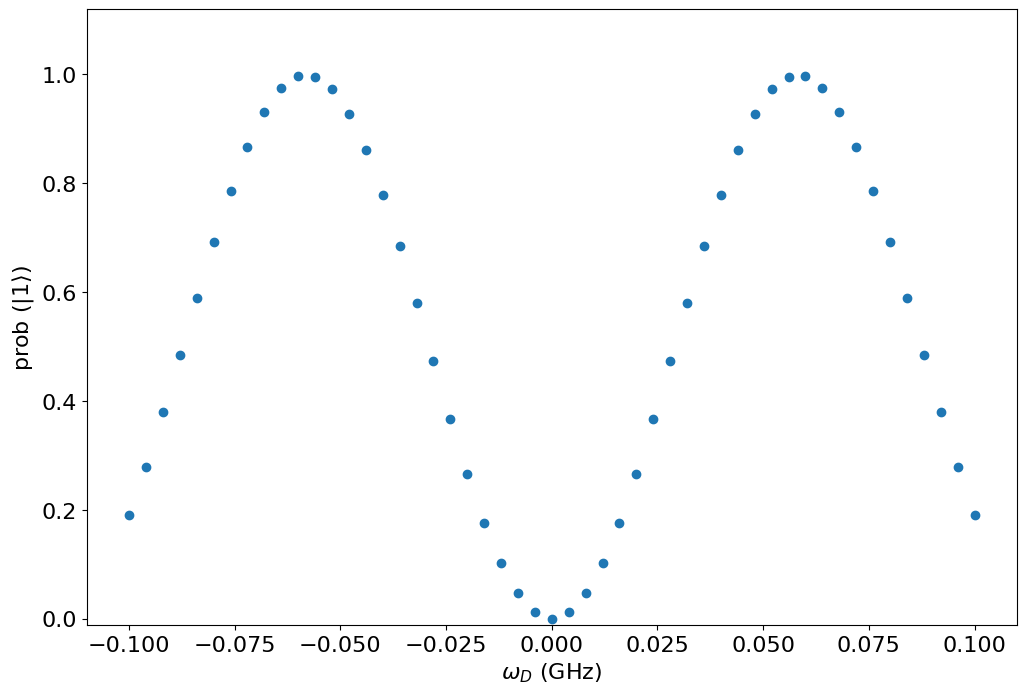

In [12]:
plt.close()
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

ax.scatter(rabi.experiment_options.get("amplitudes"), rabi_prob1)
ax.set_ylim(-0.012, 1.12)
ax.set_xlabel("$\omega_D$ (GHz)")
ax.set_ylabel(r"prob $(|1\rangle)$")

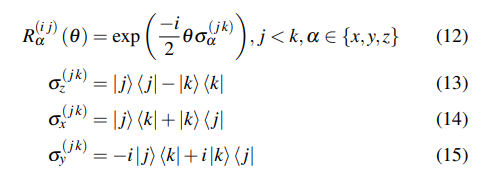

In [106]:
from scipy.linalg import expm
from sympy import Symbol, Matrix, exp, print_latex

In [115]:
theta = Symbol('theta')
sz = Matrix([[1, 0, 0], [0, 0.5, 0], [0,0, -1]])
m = -1j*theta*sz/2

In [116]:
mexp = m.exp()
mexp

Matrix([
[1.0*exp(-0.5*I*theta),                      0,                    0],
[                    0, 1.0*exp(-0.25*I*theta),                    0],
[                    0,                      0, 1.0*exp(0.5*I*theta)]])

In [117]:
mexp/exp(-1j*theta/2)

Matrix([
[1.0,                     0,                    0],
[  0, 1.0*exp(0.25*I*theta),                    0],
[  0,                     0, 1.0*exp(1.0*I*theta)]])

In [108]:
print_latex(sz)

\left[\begin{matrix}1 & 0 & 0\\0 & 0.5 & 0\\0 & 0 & -1\end{matrix}\right]


In [ ]:
Command.from_dict(
    {
        "name": "x",
        "qubits": [0],
        "sequence": [
            PulseQobjInstruction(
                name="parametric_pulse",
                t0=0,
                ch="d0",
                label="Xp_d0",
                pulse_shape="drag",
                parameters={
                    "amp": (0.1271611988628385 + 0j),
                    "beta": -1.6630804730223419,
                    "duration": 160,
                    "sigma": 40,
                },
            ).to_dict()
        ],
    }
).to_dict(),
Command.from_dict(
    {
        "name": "sx",
        "qubits": [0],
        "sequence": [
            PulseQobjInstruction(
                name="parametric_pulse",
                t0=0,
                ch="d0",
                label="Xp_d0",
                pulse_shape="drag",
                parameters={
                    "amp": (0.1271611988628385 + 0j)/2,
                    "beta": -1.6630804730223419,
                    "duration": 160,
                    "sigma": 40,
                },
            ).to_dict()
        ],
    }
).to_dict(),

In [ ]:
{
    "name": "x",
    "qubits": [4],
    "sequence": [
        PulseQobjInstruction(
            name="parametric_pulse",
            t0=0,
            ch="d4",
            label="Xp_d4",
            pulse_shape="drag",
            parameters={
                "amp": (0.1271611988628385 + 0j),
                "beta": -1.6630804730223419,
                "duration": 160,
                "sigma": 40,
            },
        )
    ],
}

In [13]:
PulseQobjInstruction(
            name="parametric_pulse",
            t0=0,
            ch="d4",
            label="Xp_d4",
            pulse_shape="drag",
            parameters={
                "amp": (0.1271611988628385 + 0j),
                "beta": -1.6630804730223419,
                "duration": 160,
                "sigma": 40,
            },
        ).to_dict()

{'name': 'parametric_pulse',
 't0': 0,
 'ch': 'd4',
 'label': 'Xp_d4',
 'pulse_shape': 'drag',
 'parameters': {'amp': (0.1271611988628385+0j),
  'beta': -1.6630804730223419,
  'duration': 160,
  'sigma': 40}}

In [14]:
(0.1271611988628385 + 0j)/2

(0.06358059943141925+0j)